In [1]:
# general tools
import os
import re
import sys
import time
import h5py
import random
from glob import glob

import numpy as np
from datetime import datetime, timedelta
from random import shuffle

In [2]:
# graph tools
import cmaps
import cartopy.crs as ccrs
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [3]:
sys.path.insert(0, '/glade/u/home/ksha/NCAR/')
sys.path.insert(0, '/glade/u/home/ksha/NCAR/libs/')

from namelist import *
import data_utils as du
import graph_utils as gu

In [4]:
filepath_vec = "/glade/work/ksha/NCAR/"
filepath_valid = "/glade/campaign/cisl/aiml/ksha/NCAR_batch/"
filepath_test = "/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4/"

In [5]:
from sklearn.metrics import brier_score_loss
from sklearn.metrics import classification_report, auc, roc_curve
from sklearn.metrics import confusion_matrix

In [6]:
need_publish = True

# True: publication quality figures
# False: low resolution figures in the notebook

if need_publish:
    dpi_ = fig_keys['dpi']
else:
    dpi_ = 75

In [7]:
FULL2 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 2), allow_pickle=True)[()]
FULL3 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 3), allow_pickle=True)[()]
FULL4 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 4), allow_pickle=True)[()]
FULL5 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 5), allow_pickle=True)[()]
FULL6 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 6), allow_pickle=True)[()]
FULL7 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 7), allow_pickle=True)[()]
FULL8 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 8), allow_pickle=True)[()]
FULL9 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 9), allow_pickle=True)[()]
FULL10 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 10), allow_pickle=True)[()]
FULL11 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 11), allow_pickle=True)[()]
FULL12 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 12), allow_pickle=True)[()]
FULL13 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 13), allow_pickle=True)[()]
FULL14 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 14), allow_pickle=True)[()]
FULL15 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 15), allow_pickle=True)[()]
FULL16 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 16), allow_pickle=True)[()]
FULL17 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 17), allow_pickle=True)[()]
FULL18 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 18), allow_pickle=True)[()]
FULL19 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 19), allow_pickle=True)[()]
FULL20 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 20), allow_pickle=True)[()]
FULL21 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 21), allow_pickle=True)[()]
#FULL22 = np.load('{}RESULT_lead{}_peak.npy'.format(filepath_vec, 22), allow_pickle=True)[()]

In [8]:
FULL2.keys()

dict_keys(['Y_pred_valid', 'VALID_Y'])

In [9]:
Y_full2 = FULL2['Y_pred_valid'][:, 0]
Y_full_true2 = FULL2['VALID_Y']

Y_full3 = FULL3['Y_pred_valid'][:, 0]
Y_full_true3 = FULL3['VALID_Y']

Y_full4 = FULL4['Y_pred_valid'][:, 0]
Y_full_true4 = FULL4['VALID_Y']

Y_full5 = FULL5['Y_pred_valid'][:, 0]
Y_full_true5 = FULL5['VALID_Y']

Y_full6 = FULL6['Y_pred_valid'][:, 0]
Y_full_true6 = FULL6['VALID_Y']

Y_full7 = FULL7['Y_pred_valid'][:, 0]
Y_full_true7 = FULL7['VALID_Y']

Y_full8 = FULL8['Y_pred_valid'][:, 0]
Y_full_true8 = FULL8['VALID_Y']

Y_full9 = FULL9['Y_pred_valid'][:, 0]
Y_full_true9 = FULL9['VALID_Y']

Y_full10 = FULL10['Y_pred_valid'][:, 0]
Y_full_true10 = FULL10['VALID_Y']

Y_full11 = FULL11['Y_pred_valid'][:, 0]
Y_full_true11 = FULL11['VALID_Y']

Y_full12 = FULL12['Y_pred_valid'][:, 0]
Y_full_true12 = FULL12['VALID_Y']

Y_full13 = FULL13['Y_pred_valid'][:, 0]
Y_full_true13 = FULL13['VALID_Y']

Y_full14 = FULL14['Y_pred_valid'][:, 0]
Y_full_true14 = FULL14['VALID_Y']

Y_full15 = FULL15['Y_pred_valid'][:, 0]
Y_full_true15 = FULL15['VALID_Y']

Y_full16 = FULL16['Y_pred_valid'][:, 0]
Y_full_true16 = FULL16['VALID_Y']

Y_full17 = FULL17['Y_pred_valid'][:, 0]
Y_full_true17 = FULL17['VALID_Y']

Y_full18 = FULL18['Y_pred_valid'][:, 0]
Y_full_true18 = FULL18['VALID_Y']

Y_full19 = FULL19['Y_pred_valid'][:, 0]
Y_full_true19 = FULL19['VALID_Y']

Y_full20 = FULL20['Y_pred_valid'][:, 0]
Y_full_true20 = FULL20['VALID_Y']

Y_full21 = FULL21['Y_pred_valid'][:, 0]
Y_full_true21 = FULL21['VALID_Y']

In [10]:
def verif_metric(VALID_target, Y_pred):
    ref = np.sum(VALID_target) / len(VALID_target)
    BS = np.mean((VALID_target.ravel() - Y_pred.ravel())**2)
    metric = BS
    return 1 - metric / ref

In [11]:
def reliability_diagram(cate_true, prob_model, bins):
    binids = np.searchsorted(bins, prob_model)
    bin_sums = np.bincount(binids, weights=prob_model, minlength=len(bins))
    bin_true = np.bincount(binids, weights=cate_true, minlength=len(bins))
    bin_total = np.bincount(binids, minlength=len(bins))
    flag = bin_total > 0
    prob_true = bin_true/bin_total
    prob_pred = bin_sums/bin_total
    prob_true[~flag] = np.nan
    return prob_true, prob_pred

def bs_3c(pred, frac, o, use):
    '''
    bs three components decompose
    '''
    rel = np.nansum(((pred - frac)**2)*use)/np.sum(use)
    res = np.nansum(((frac - o)**2)*use)/np.sum(use)
    return rel, res

def reliability_diagram_calc(y_true, y_pred_calib, N_boost=100, N_bins=25):
    L = len(y_pred_calib)
    hist_bins = np.linspace(0, 1, N_bins)

    prob_true = np.empty((N_bins, N_boost))
    prob_pred = np.empty((N_bins, N_boost))
    
    
    for n in range(N_boost):

        ind_bagging = np.random.choice(L, size=L, replace=True)
        obs_ = y_true[ind_bagging]
        fcst_ = y_pred_calib[ind_bagging]

        prob_true_, prob_pred_ = reliability_diagram(obs_, fcst_, hist_bins)
        prob_true[:, n] = prob_true_
        prob_pred[:, n] = prob_pred_
        
        
    o_bar = np.mean(y_true)
    hist_bins_ = np.mean(prob_pred, axis=1)
    hist_bins_[0] = 0

    use_, _ = np.histogram(y_pred_calib, bins=np.array(list(hist_bins_)+[1.0]))
    #use = use_/L
    
    prob_pred_mean = np.mean(prob_pred, axis=1)
    prob_true_mean = np.mean(prob_true, axis=1)

    prob_pred_mean[0] = 0
    prob_true_mean[0] = 0
    return prob_true, prob_pred, hist_bins_, use_, o_bar, prob_pred_mean, prob_true_mean


def bss_component_calc(y_true, y_pred_calib, prob_pred_mean, prob_true_mean, o_bar, use_):
    
    rel, res = bs_3c(prob_pred_mean, prob_true_mean, o_bar, use_)
    bs = brier_score_loss(y_true, y_pred_calib)
    res = (o_bar)*(1-o_bar) + rel - bs
    bss = (o_bar-bs)/(o_bar)
    
    return bss, bs, rel, res, o_bar

def performance_diagram_calc(y_true, y_pred_calib, N=50):
    thres = np.linspace(0.0, 0.6, N)
    pod = np.empty(N)
    sr = np.empty(N)

    for i, thre in enumerate(thres):
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred_calib>thre).ravel()
        pod[i] = tp / (tp + fn)

        if fp + tp > 1:
            sr[i] = tp / (fp + tp)
        else:
            sr[i] = np.nan
            
    return sr, pod
    

In [12]:
def verf_auc_bss(y_true, y_pred):
    fpr_v, tpr_v, _ = roc_curve(y_true, y_pred)
    o_bar_v = np.mean(y_true)

    bs_v = brier_score_loss(y_true, y_pred)
    auc_score_v = auc(fpr_v, tpr_v)
    bss_v = (o_bar_v-bs_v)/(o_bar_v)

    return auc_score_v, bss_v, bs_v

In [13]:
auc_score_f2, bss_f2, _ = verf_auc_bss(Y_full_true2, Y_full2)
auc_score_f3, bss_f3, _ = verf_auc_bss(Y_full_true3, Y_full3)
auc_score_f4, bss_f4, _ = verf_auc_bss(Y_full_true4, Y_full4)
auc_score_f5, bss_f5, _ = verf_auc_bss(Y_full_true5, Y_full5)
auc_score_f6, bss_f6, _ = verf_auc_bss(Y_full_true6, Y_full6)
auc_score_f7, bss_f7, _ = verf_auc_bss(Y_full_true7, Y_full7)
auc_score_f8, bss_f8, _ = verf_auc_bss(Y_full_true8, Y_full8)
auc_score_f9, bss_f9, _ = verf_auc_bss(Y_full_true9, Y_full9)
auc_score_f10, bss_f10, _ = verf_auc_bss(Y_full_true10, Y_full10)
auc_score_f11, bss_f11, _ = verf_auc_bss(Y_full_true11, Y_full11)
auc_score_f12, bss_f12, _ = verf_auc_bss(Y_full_true12, Y_full12)
auc_score_f13, bss_f13, _ = verf_auc_bss(Y_full_true13, Y_full13)
auc_score_f14, bss_f14, _ = verf_auc_bss(Y_full_true14, Y_full14)
auc_score_f15, bss_f15, _ = verf_auc_bss(Y_full_true15, Y_full15)
auc_score_f16, bss_f16, _ = verf_auc_bss(Y_full_true16, Y_full16)
auc_score_f17, bss_f17, _ = verf_auc_bss(Y_full_true17, Y_full17)
auc_score_f18, bss_f18, _ = verf_auc_bss(Y_full_true18, Y_full18)
auc_score_f19, bss_f19, _ = verf_auc_bss(Y_full_true19, Y_full19)
auc_score_f20, bss_f20, _ = verf_auc_bss(Y_full_true20, Y_full20)
auc_score_f21, bss_f21, _ = verf_auc_bss(Y_full_true21, Y_full21)

In [14]:
BSS = np.array([bss_f2, bss_f3, bss_f4, bss_f5, bss_f6, bss_f7, bss_f8, bss_f9, bss_f10, 
                bss_f11, bss_f12, bss_f13, bss_f14, bss_f15, bss_f16, bss_f17, bss_f18, 
                bss_f19, bss_f20, bss_f21])

leads = np.arange(2, 22, 1)

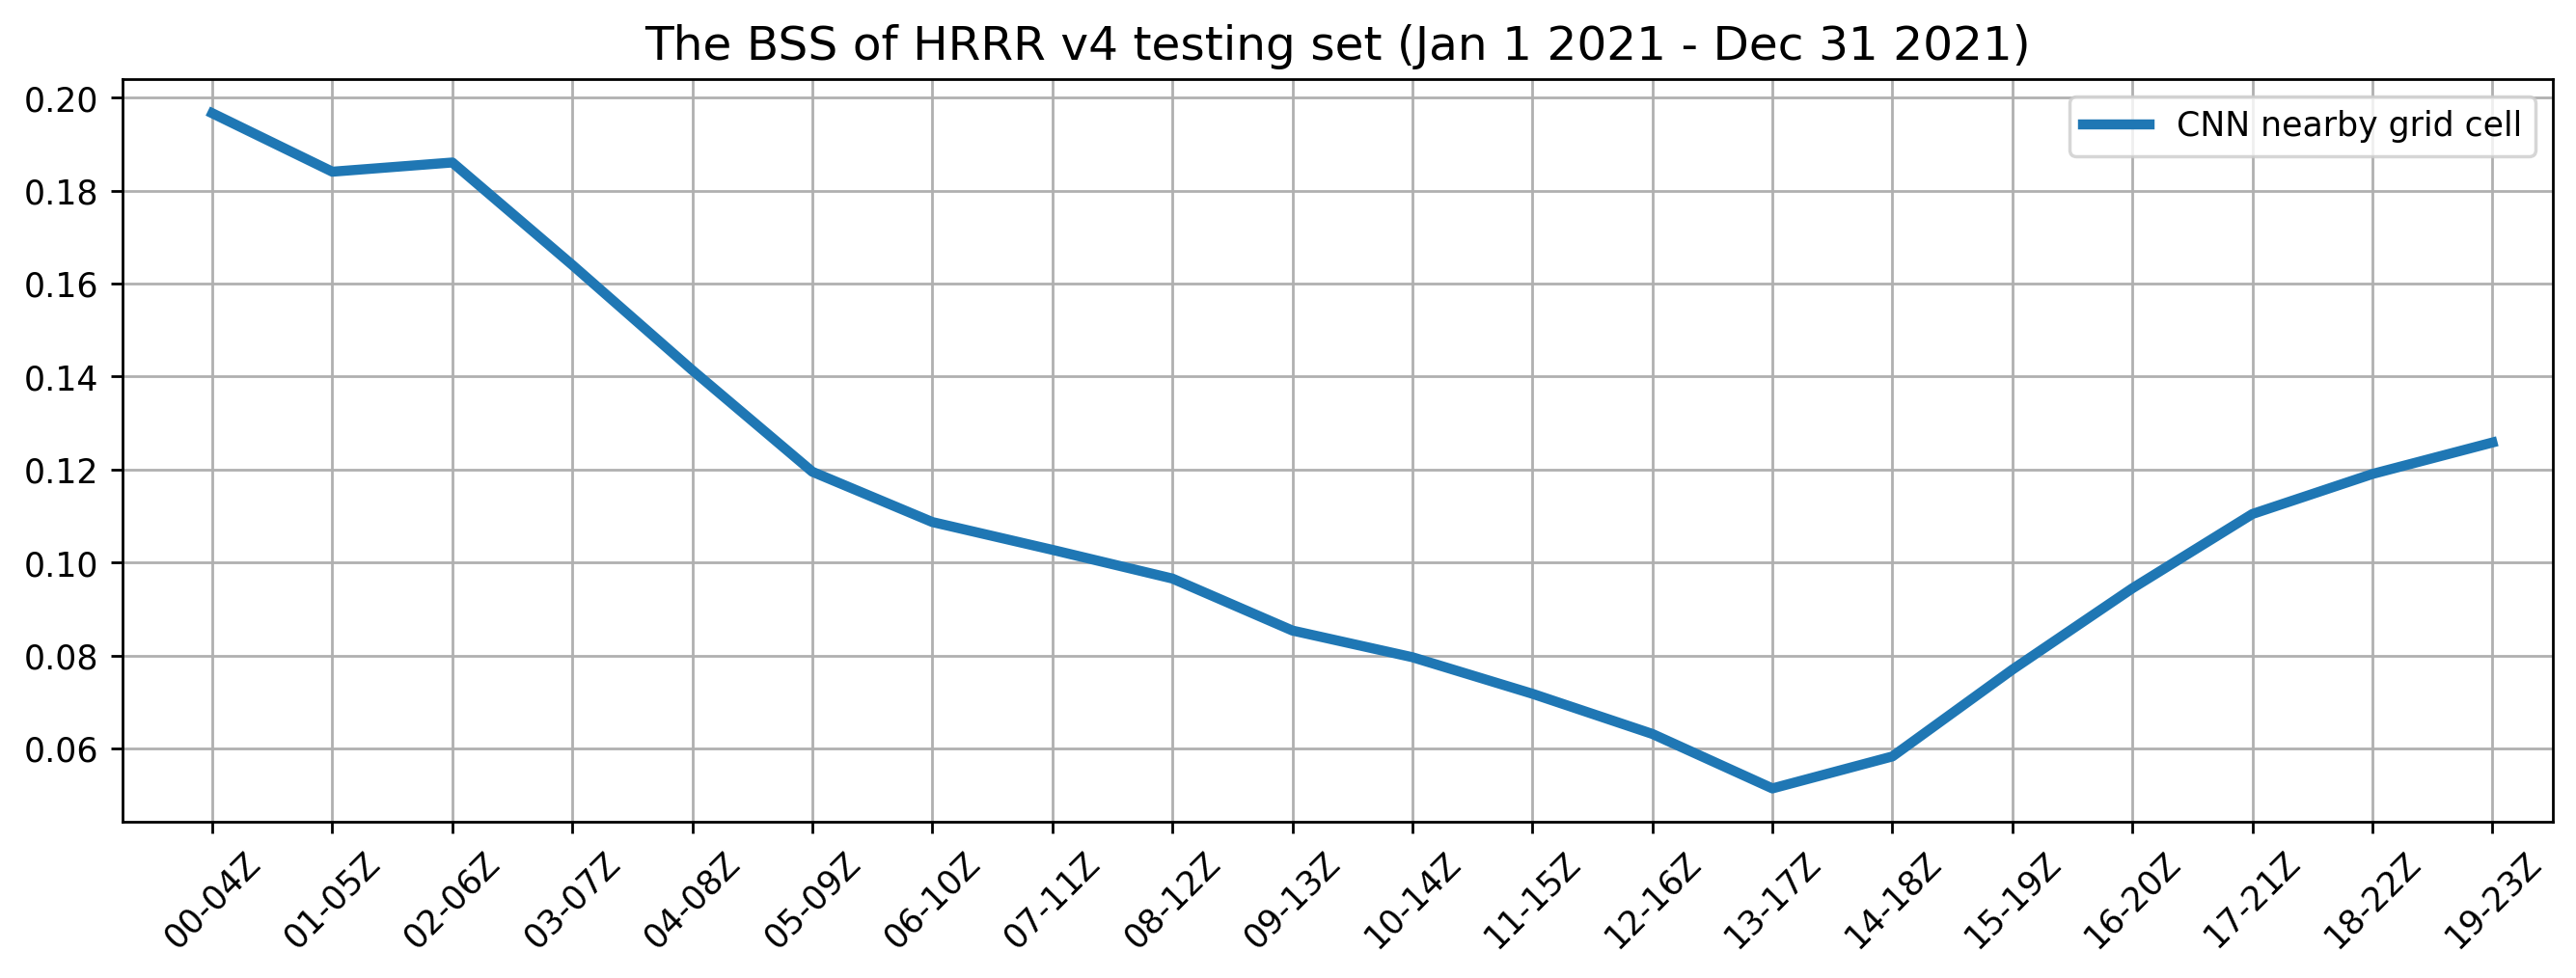

In [15]:
fig = plt.figure(figsize=(13, 4), dpi=dpi_)
ax = fig.gca()
ax.grid()

ax.set_xlim([1.25, 21.5])
ax.set_xticks(leads)
ax.set_xticklabels(['00-04Z', '01-05Z', '02-06Z', '03-07Z', 
                    '04-08Z', '05-09Z', '06-10Z', '07-11Z',
                    '08-12Z', '09-13Z', '10-14Z', '11-15Z',
                    '12-16Z', '13-17Z', '14-18Z', '15-19Z',
                    '16-20Z', '17-21Z', '18-22Z','19-23Z',], rotation=45)

ax.plot(leads, BSS, lw=3, label='CNN nearby grid cell')
ax.set_title('The BSS of HRRR v4 testing set (Jan 1 2021 - Dec 31 2021)', fontsize=14)
plt.legend()

In [16]:
VERIF = {}

VERIF['y_true_234'] = np.concatenate((Y_full_true2, Y_full_true3, Y_full_true4), axis=0)
VERIF['y_pred_234'] = np.concatenate((Y_full2, Y_full3, Y_full4), axis=0)

VERIF['y_true_456'] = np.concatenate((Y_full_true4, Y_full_true5, Y_full_true6), axis=0)
VERIF['y_pred_456'] = np.concatenate((Y_full4, Y_full5, Y_full6), axis=0)

VERIF['y_true_789'] = np.concatenate((Y_full_true7, Y_full_true8, Y_full_true9), axis=0)
VERIF['y_pred_789'] = np.concatenate((Y_full7, Y_full8, Y_full9), axis=0)

VERIF['y_true_101112'] = np.concatenate((Y_full_true10, Y_full_true11, Y_full_true12), axis=0)
VERIF['y_pred_101112'] = np.concatenate((Y_full10, Y_full11, Y_full12), axis=0)

VERIF['y_true_131415'] = np.concatenate((Y_full_true13, Y_full_true14, Y_full_true15), axis=0)
VERIF['y_pred_131415'] = np.concatenate((Y_full13, Y_full14, Y_full15), axis=0)

VERIF['y_true_161718'] = np.concatenate((Y_full_true16, Y_full_true17, Y_full_true18), axis=0)
VERIF['y_pred_161718'] = np.concatenate((Y_full16, Y_full17, Y_full18), axis=0)

VERIF['y_true_192021'] = np.concatenate((Y_full_true19, Y_full_true20, Y_full_true21), axis=0)
VERIF['y_pred_192021'] = np.concatenate((Y_full19, Y_full20, Y_full21), axis=0)

In [17]:
keys = ['234', '456', '789', '101112', '131415', '161718', '192021']

for key in keys:
    package_v = reliability_diagram_calc(VERIF['y_true_{}'.format(key)], VERIF['y_pred_{}'.format(key)], N_boost=50, N_bins=15)
    prob_true_v, prob_pred_v, hist_bins_v, use_v, o_bar_v, prob_pred_mean_v, prob_true_mean_v, = package_v
    VERIF['prob_true_v_{}'.format(key)] = prob_true_v
    VERIF['prob_pred_v_{}'.format(key)] = prob_pred_v
    VERIF['hist_bins_v_{}'.format(key)] = hist_bins_v
    VERIF['use_v_{}'.format(key)] = use_v
    VERIF['o_bar_v_{}'.format(key)] = o_bar_v
    VERIF['prob_pred_mean_v_{}'.format(key)] = prob_pred_mean_v
    VERIF['prob_true_mean_v_{}'.format(key)] = prob_true_mean_v

/glade/scratch/ksha/ipykernel_67998/1675791555.py:7: RuntimeWarning: invalid value encountered in true_divide
  prob_true = bin_true/bin_total
/glade/scratch/ksha/ipykernel_67998/1675791555.py:8: RuntimeWarning: invalid value encountered in true_divide
  prob_pred = bin_sums/bin_total


In [18]:
# sr_v, pod_v = performance_diagram_calc(Y_true, Y_pred, N=50)
# csi_v = ((1 / sr_v) + (1 / pod_v) - 1) ** -1
# max_v = np.max(csi_v)
# thres_max_v = np.linspace(0.01, 0.35, 50)[np.argmax(csi_v)]

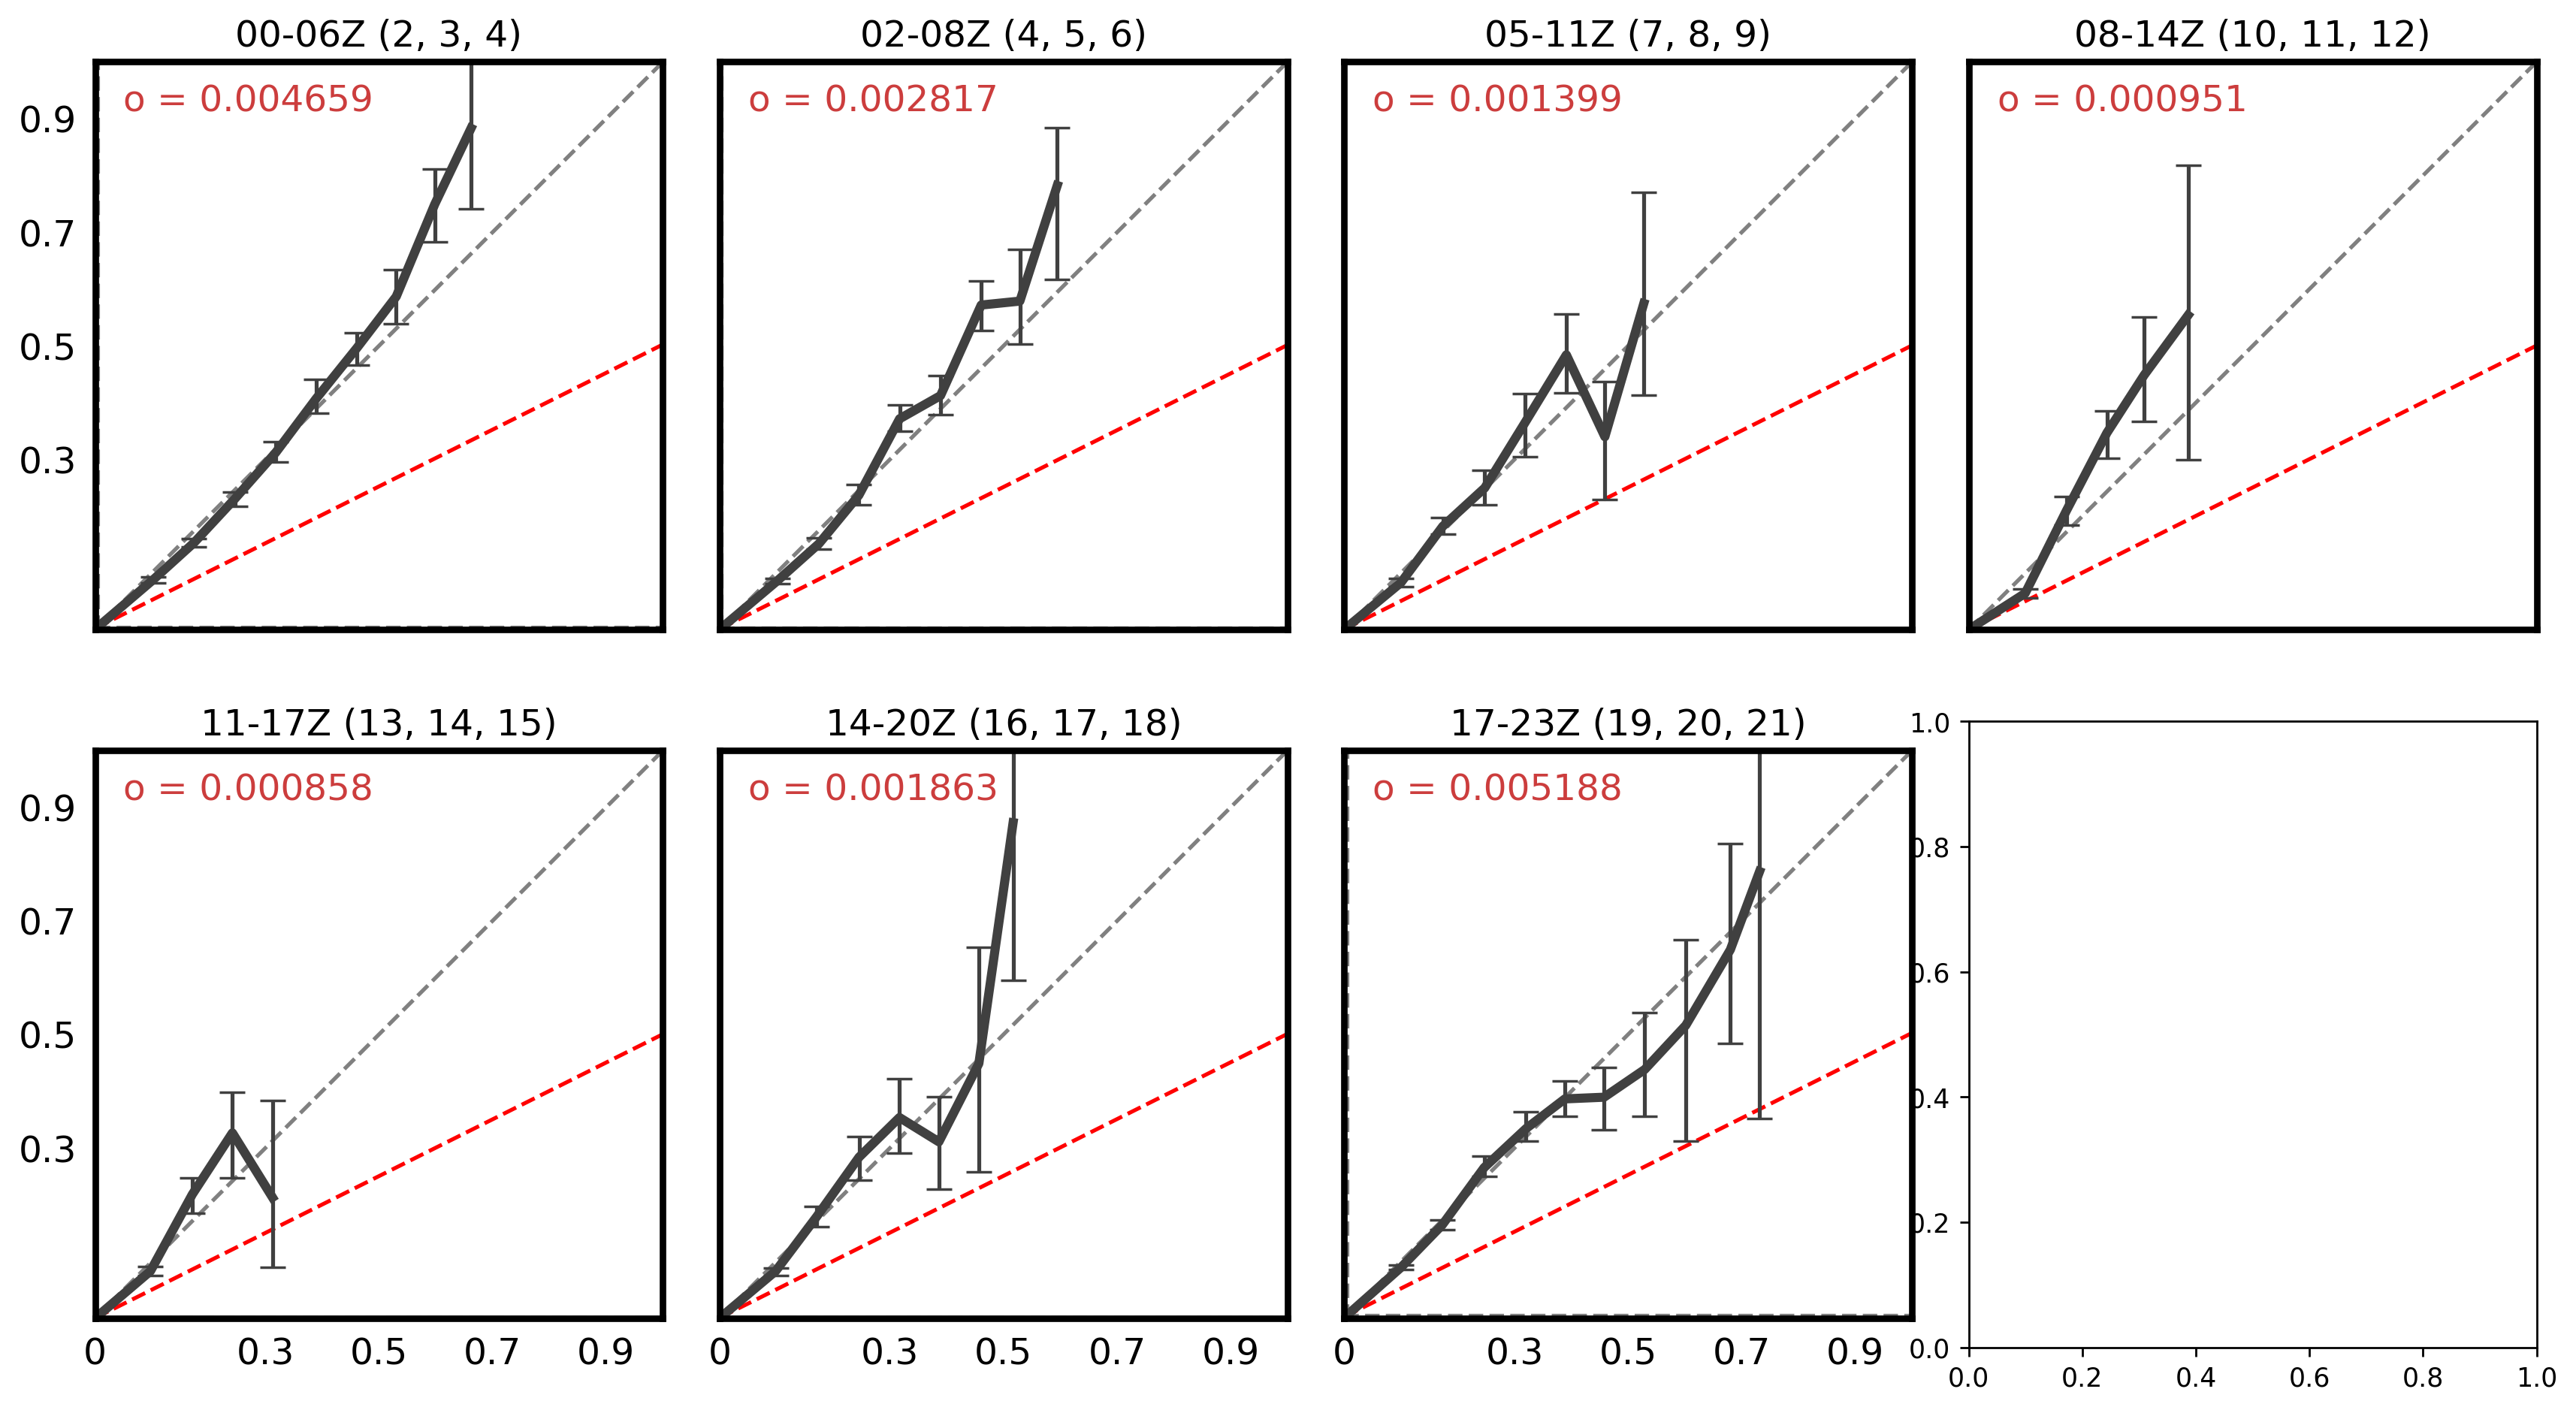

In [19]:
#Lv_v = len(Y_true)

fig = plt.figure(figsize=(13, 7), dpi=dpi_)
gs = gridspec.GridSpec(2, 4)

AX = []
for i in range(2):
    for j in range(4):
         AX.append(plt.subplot(gs[i, j]))
            
plt.subplots_adjust(0, 0, 1, 1, hspace=0.1, wspace=0.1)

keys = ['234', '456', '789', '101112', '131415', '161718', '192021']
keys_title = ['00-06Z (2, 3, 4)', '02-08Z (4, 5, 6)', '05-11Z (7, 8, 9)', '08-14Z (10, 11, 12)', 
              '11-17Z (13, 14, 15)', '14-20Z (16, 17, 18)', '17-23Z (19, 20, 21)']

for i, key in enumerate(keys):
    ax = AX[i]
    prob_true_v = VERIF['prob_true_v_{}'.format(key)]
    prob_pred_v = VERIF['prob_pred_v_{}'.format(key)]
    hist_bins_v = VERIF['hist_bins_v_{}'.format(key)]
    use_v = VERIF['use_v_{}'.format(key)]
    o_bar_v = VERIF['o_bar_v_{}'.format(key)]
    prob_pred_mean_v = VERIF['prob_pred_mean_v_{}'.format(key)]
    prob_true_mean_v = VERIF['prob_true_mean_v_{}'.format(key)]

    ax = gu.ax_decorate_box(ax)
    
    fake_x = np.linspace(0, 1, 100)
    fake_y = 0.5*fake_x + 0.5*o_bar_v
    
    ax.plot(fake_x, fake_x, linewidth=1.5, linestyle='--', color='0.5')
    ax.plot(fake_x, fake_y, linewidth=1.5, linestyle='--', color='r')
    # axis ticks
    ax.tick_params(axis="both", which="both", labelbottom=False, labelleft=False)
    ax.set_xlim([0, 1.0])
    ax.set_xticks([0, 0.3, 0.5, 0.7, 0.9])
    ax.set_xticklabels([0, 0.3, 0.5, 0.7, 0.9])
    ax.set_ylim([0, 1.0])
    ax.set_yticks([0.3, 0.5, 0.7, 0.9])
    ax.set_yticklabels([0.3, 0.5, 0.7, 0.9])
    ax.set_aspect('equal')
    
    ax.text(0.05, 0.9, 'o = {:.6f}'.format(o_bar_v), ha='left', va='bottom', color=red, fontsize=14)
    ax.axvline(x=o_bar_v, ymin=0, ymax=1, linewidth=1.5, linestyle='--', color='0.5')
    ax.axhline(y=o_bar_v, xmin=0, xmax=1, linewidth=1.5, linestyle='--', color='0.5')
    
    temp_95_v = np.quantile(prob_true_v, 0.95, axis=1) - prob_true_mean_v
    temp_05_v = prob_true_mean_v - np.quantile(prob_true_v, 0.05, axis=1)
    error_v = np.array(list(zip(temp_05_v, temp_95_v))).T

    ax.errorbar(prob_pred_mean_v, prob_true_mean_v, yerr=error_v, linestyle='-', capsize=5, 
                color='0.25', linewidth=3.5, elinewidth=1.5)
    
    ax.set_title(keys_title[i], fontsize=14)

for i in range(4):
    AX[4+i].tick_params(axis="both", which="both", labelbottom=True)

AX[0].tick_params(axis="both", which="both", labelleft=True)
AX[4].tick_params(axis="both", which="both", labelleft=True)

In [20]:
base_v3_s = datetime(2018, 7, 15)
base_v3_e = datetime(2020, 12, 2)

base_v4_s = datetime(2020, 12, 3)
base_v4_e = datetime(2022, 7, 15)

base_ref = datetime(2010, 1, 1)

date_list_v3 = [base_v3_s + timedelta(days=day) for day in range(365+365+142)]
date_list_v4 = [base_v4_s + timedelta(days=day) for day in range(365+180)]

In [21]:
def id_extract(filenames):
    
    indx_out = []
    indy_out = []
    days_out = []
    
    for i, name in enumerate(filenames):
        nums = re.findall(r'\d+', name)
        lead = int(nums[-1])
        indy = int(nums[-2])
        indx = int(nums[-3])
        day = int(nums[-4])
                
        indx_out.append(indx)
        indy_out.append(indy)
        days_out.append(day)
        
    return np.array(indx_out), np.array(indy_out), np.array(days_out)

In [22]:
FIELD = {}
FIELD['lead2_pred'] = Y_full2
FIELD['lead2_true'] = Y_full_true2
FIELD['lead3_pred'] = Y_full3
FIELD['lead3_true'] = Y_full_true3
FIELD['lead4_pred'] = Y_full4
FIELD['lead4_true'] = Y_full_true4
FIELD['lead5_pred'] = Y_full5
FIELD['lead5_true'] = Y_full_true5
FIELD['lead6_pred'] = Y_full6
FIELD['lead6_true'] = Y_full_true6
FIELD['lead7_pred'] = Y_full7
FIELD['lead7_true'] = Y_full_true7
FIELD['lead8_pred'] = Y_full8
FIELD['lead8_true'] = Y_full_true8
FIELD['lead9_pred'] = Y_full9
FIELD['lead9_true'] = Y_full_true9
FIELD['lead10_pred'] = Y_full10
FIELD['lead10_true'] = Y_full_true10
FIELD['lead11_pred'] = Y_full11
FIELD['lead11_true'] = Y_full_true11
FIELD['lead12_pred'] = Y_full12
FIELD['lead12_true'] = Y_full_true12
FIELD['lead13_pred'] = Y_full13
FIELD['lead13_true'] = Y_full_true13
FIELD['lead14_pred'] = Y_full14
FIELD['lead14_true'] = Y_full_true14
FIELD['lead15_pred'] = Y_full15
FIELD['lead15_true'] = Y_full_true15
FIELD['lead16_pred'] = Y_full16
FIELD['lead16_true'] = Y_full_true16
FIELD['lead17_pred'] = Y_full17
FIELD['lead17_true'] = Y_full_true17
FIELD['lead18_pred'] = Y_full18
FIELD['lead18_true'] = Y_full_true18
FIELD['lead19_pred'] = Y_full19
FIELD['lead19_true'] = Y_full_true19
FIELD['lead20_pred'] = Y_full20
FIELD['lead20_true'] = Y_full_true20
FIELD['lead21_pred'] = Y_full21
FIELD['lead21_true'] = Y_full_true21

In [23]:
leads = np.arange(4, 22, 1)

In [24]:
with h5py.File(save_dir+'HRRR_domain.hdf', 'r') as h5io:
    lon_3km = h5io['lon_3km'][...]
    lat_3km = h5io['lat_3km'][...]
    lon_80km = h5io['lon_80km'][...]
    lat_80km = h5io['lat_80km'][...]
    elev_3km = h5io['elev_3km'][...]
    land_mask_80km = h5io['land_mask_80km'][...]
    
grid_shape = land_mask_80km.shape

PRED_SAVE = np.empty((365, 18)+grid_shape)
PRED_SAVE[...] = np.nan

TRUE_SAVE = np.empty((365, 18)+grid_shape)
TRUE_SAVE[...] = np.nan

In [25]:
# IND_TEST_lead = np.load('/glade/work/ksha/NCAR/IND_TEST_lead_v4.npy', allow_pickle=True)[()]

# for l, lead in enumerate(leads):
#     filename_valid = sorted(glob("/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4_temp/TEST*lead{}.npy".format(lead)))
#     VALID_ind = IND_TEST_lead['lead{}'.format(lead)]
    
#     L = len(VALID_ind)
#     filename_valid_pick = []

#     for i in range(L):
#         ind_lead = int(VALID_ind[i])
#         filename_valid_pick.append(filename_valid[ind_lead])
        
#     indx_valid, indy_valid, days_valid = id_extract(filename_valid_pick)
    
#     days_begin = np.min(days_valid)
    
#     for i in range(len(filename_valid_pick)):
#         day = days_valid[i]
#         indx = indx_valid[i]
#         indy = indy_valid[i]

#         PRED_SAVE[day-days_begin, l, indx, indy] = FIELD['lead{}_pred'.format(lead)][i]
#         TRUE_SAVE[day-days_begin, l, indx, indy] = FIELD['lead{}_true'.format(lead)][i]

In [26]:
# save_dir = '/glade/work/ksha/NCAR/'
# tuple_save = (lon_80km, lat_80km, land_mask_80km, leads, PRED_SAVE, TRUE_SAVE)
# label_save = ['lon_80km', 'lat_80km', 'land_mask_80km', 'lead_times', 'y_pred', 'y_true']
# du.save_hdf5(tuple_save, label_save, save_dir, 'CNN_ExWeather_HRRRv4_2021.hdf')

In [27]:
def aspc_cal(edge):
    return (edge[3]-edge[2])/(edge[1]-edge[0])

def gcd(a, b):
    if b == 0:
        return a
    else:
        return gcd(b, a % b)

# Cartopy map settings
scale_param = '50m' # 10m for publication quality
# US states and CAN-US boundary
PROVINCE = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale=scale_param,
    facecolor='none')

In [28]:
with h5py.File(save_dir+'CNN_ExWeather_HRRRv4_2021.hdf', 'r') as h5io:
    PRED_SAVE = h5io['y_pred'][...]
    TRUE_SAVE = h5io['y_true'][...]


In [32]:
lead = 5 #4-21

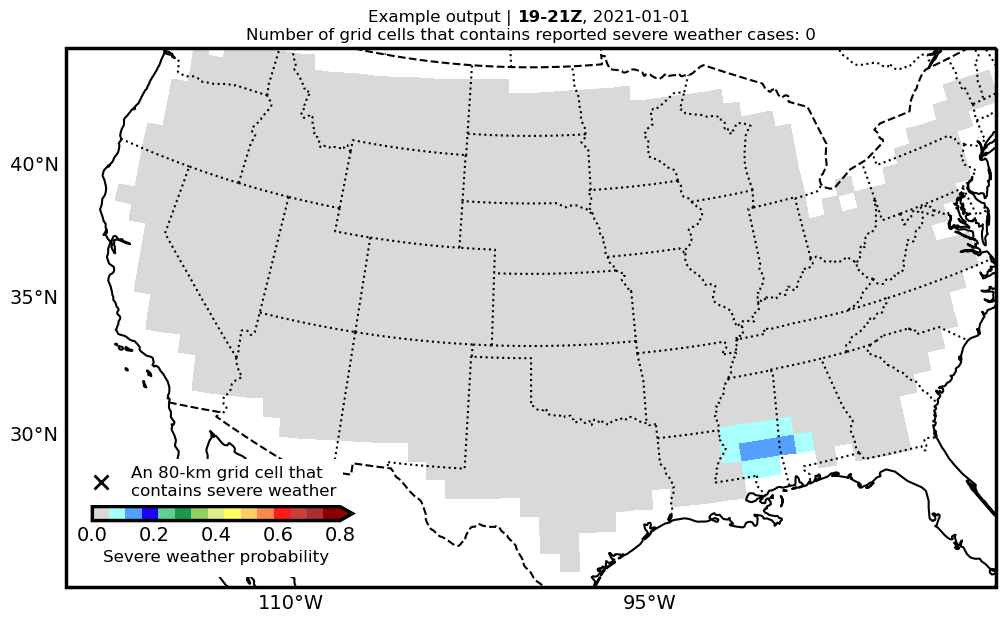

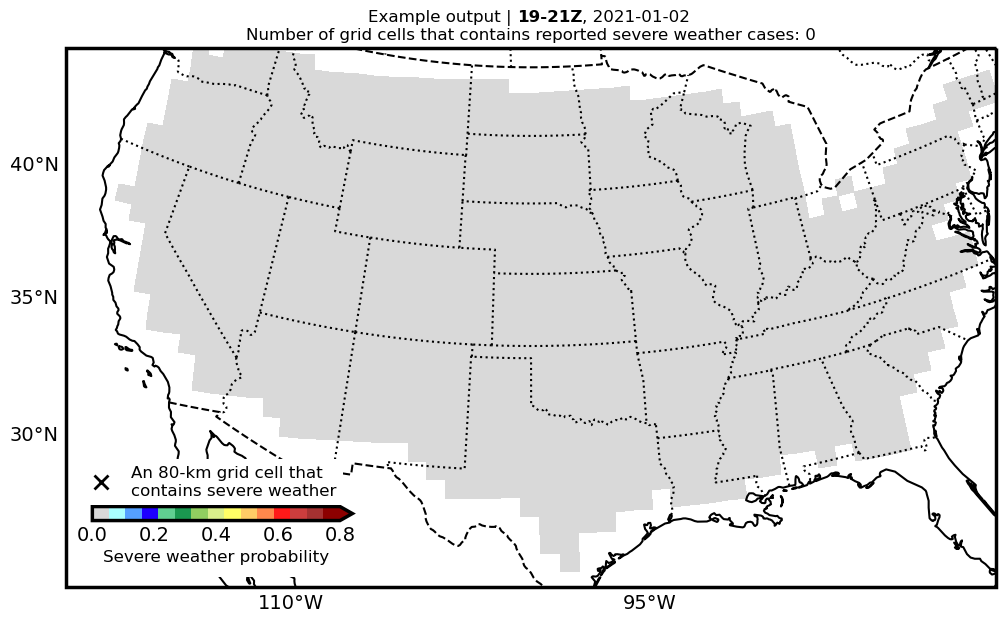

In [33]:
edge = [-120, -80, 27.5, 47.5]
cmap_pct, A = gu.precip_cmap()
proj_ = ccrs.NorthPolarStereo(central_longitude=-100)

count = 0
date_list_v4 = [datetime(2021, 1, 1) + timedelta(days=day) for day in range(365)]

true_grid_v = TRUE_SAVE[:, lead-4, ...]
prob_grid_v = PRED_SAVE[:, lead-4, ...]

for day in range(0, 2):
    
    record_temp = true_grid_v[day, ...]
    
    lon_temp = lon_80km[record_temp>0]
    lat_temp = lat_80km[record_temp>0]
    
    N_case = len(lon_temp)
    
    if N_case >= 0:
        
        fig = plt.figure(figsize=(13, 7))
        #ax = plt.axes(projection=ccrs.PlateCarree())
        ax = plt.axes(projection=proj_)
        
        ax.set_extent(edge, ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE.with_scale(scale_param), edgecolor='k', linewidth=1.5, zorder=6)
        ax.add_feature(cfeature.BORDERS.with_scale(scale_param), linestyle='--', linewidth=1.5, zorder=6)
        ax.add_feature(PROVINCE, edgecolor='k', linestyle=':', linewidth=1.5, zorder=5)

        GL = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='k', linewidth=0, zorder=5)
        GL.top_labels = None
        GL.right_labels = None
        GL.xlocator = mticker.FixedLocator([-125, -110, -95, -80])
        GL.ylocator = mticker.FixedLocator([30, 35, 40, 45])
        GL.xlabel_style = {'size': 14}
        GL.ylabel_style = {'size': 14}
        GL.rotate_labels = False
        # # grid lines but lines only
        # GL = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, x_inline=False, y_inline=False, color='k', linestyle=':', zorder=5)
        
        ax.spines['geo'].set_linewidth(2.5)

        CS = ax.pcolormesh(lon_80km, lat_80km, prob_grid_v[day, ...], vmin=0, vmax=0.8, cmap=cmap_pct, transform=ccrs.PlateCarree())
        ax.plot(lon_temp, lat_temp, 'kx', ms=10, mec='k', mew=2.0, mfc='k', transform=ccrs.PlateCarree())
        
        ax_t1 = fig.add_axes([0.5-(0.25/2)+0.012, 0.915, 0.25, 0.02])
        ax_t1.set_axis_off()
        gu.string_partial_format(fig, ax_t1, 0.0, 1.0, 'left', 'top', 
                         ['Example output | ', '19-21Z', ', {}'.format(datetime.strftime(date_list_v4[day], '%Y-%m-%d'))],
                         ['k',]*3, [12,]*3, ['normal', 'bold', 'normal']);
        
        ax.set_title('Number of grid cells that contains reported severe weather cases: {}'.format(N_case))
        ax.set_xlabel('lon', fontsize=14)
        ax.set_ylabel('lat', fontsize=14)
        

        ax_base = fig.add_axes([0.175, 0.125, 0.2, 0.1])
        [j.set_linewidth(0.0) for j in ax_base.spines.values()]
        ax_base.tick_params(axis='both', left=False, top=False, right=False, bottom=False, \
                            labelleft=False, labeltop=False, labelright=False, labelbottom=False)
        cax = inset_axes(ax_base, height='20%', width='100%', borderpad=0, loc=2)
        CBar = plt.colorbar(CS, orientation='horizontal', ticks=[0, 0.2, 0.4, 0.6, 0.8], extend='max', cax=cax)
        CBar.ax.tick_params(axis='x', labelsize=14, direction='in', length=0)
        CBar.set_label('Severe weather probability', fontsize=12)
        CBar.outline.set_linewidth(2.5)
        
        handle_lines1 = []
        handle_lines1.append(mlines.Line2D([], [], label='An 80-km grid cell that\ncontains severe weather', 
                                           color='k', linewidth=0, marker='x', ms=10, mec='k', mew=2.0, mfc='k'))
        
        
        ax_lg1 = fig.add_axes([0.1575, 0.2375, 0.22, 0.045])
        ax_lg1.set_axis_off()
        LG1 = ax_lg1.legend(handles=handle_lines1, bbox_to_anchor=(0.0, 0.5), ncol=1, loc=6, 
                            prop={'size':12}, fancybox=False);
        LG1.get_frame().set_facecolor('w')
        LG1.get_frame().set_linewidth(0)
        LG1.get_frame().set_alpha(1.0)
        
        # points = np.array([[-127, 26], [-110, 26], [-110, 30], [-127, 30],])
        # mask = PatchCollection([patches.Polygon(points)], facecolor='r', linewidth=0, transform=ccrs.PlateCarree(), zorder=6)
        # ax.add_collection(mask)
        
        #fig.savefig(fig_dir+'example{}_lead2.png'.format(count), format='png', **fig_keys)
        count += 1
        #break;